Importing libraries and data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [37]:
path = '/content/gdrive/My Drive/intern_dataset'
data_file = os.path.join(path, "heart_failure_clinical_records_dataset.csv")
heart = pd.read_csv(data_file)


In [38]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Separating x and y from datasets

In [39]:
y = heart['DEATH_EVENT']

In [40]:
x = heart.iloc[:,:-1]
x = (x -x.mean())/x.std() 
x = np.c_[np.ones(x.shape[0]), x]

In [41]:
x

array([[ 1.        ,  1.19094867, -0.86964686, ...,  0.73445691,
        -0.68653097, -1.62677521],
       [ 1.        , -0.49045705, -0.86964686, ...,  0.73445691,
        -0.68653097, -1.60100673],
       [ 1.        ,  0.35024581, -0.86964686, ...,  0.73445691,
         1.45172695, -1.58812249],
       ...,
       [ 1.        , -1.33115991, -0.86964686, ..., -1.35699658,
        -0.68653097,  1.90350626],
       [ 1.        , -1.33115991, -0.86964686, ...,  0.73445691,
         1.45172695,  1.92927473],
       [ 1.        , -0.91080848, -0.86964686, ...,  0.73445691,
         1.45172695,  1.99369593]])

Logistic Regression Model

In [42]:
class LogisticRegression:
    def __init__(self, alpha =0.01):

        self.alpha = alpha # learning rate 
        self.hist_loss =[] # empty list for loss histroy 
        self.hist_param = []  # empty list for parameter updates


    def fit_gd(self,x, y, iterations):

      """
      This fit function works for a gradident decent
      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        prediction = 1.0 / (1.0 + np.exp((-1) *np.dot(x, self.theta)))
        error = prediction - y
        loss = (-1)*np.sum((y*np.log(prediction)) + ((1-y)*np.log(1-prediction))) / (m)
        self.hist_loss.append(loss)
        self.theta = self.theta - (self.alpha * (1/m) * np.dot(x.T, error))
        if it%50 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_sgd(self,x, y, iterations):
      """
      This fit function works for a  Stocashtic gradident Decent, where we uptimized the parameters using 
      single observation 

      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        loss = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)  # updating  with one sample at a time
            x_i = x[rand_ind,:] 
            y_i = y[rand_ind]
            prediction = np.dot(x_i, self.theta)
            error = prediction - y_i
            loss =+1/2 * np.dot(error.T, error) 
            self.theta = self.theta - (self.alpha * np.dot(x_i.T, error))
        self.hist_loss.append(loss)
        if it%200 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

    def fit_batch_sgd(self, x, y, iterations, batch_size = 5):
        """
        This fit function works for a  Stocashtic gradident Decent with batch, where we uptimized the parameters using handful of samples. It is very efficient 
        for large dataset
      
        x : input feature  (m , d), where m = number of data points and d = dimension of the data 
        y : target value (m ,)
        interations : int , number of interation point) 
        """ 
        self.theta =  np.random.rand(x.shape[1])
        m = y.size
        n_batch = int(x.shape[0]/batch_size)
        for it in range(iterations):
              rand_indices = np.random.choice(range(m), size= batch_size) 
              x_b = x[rand_indices] 
              y_b = y[rand_indices]
              prediction = np.dot(x_b, self.theta)
              error = prediction - y_b
              loss =+1/(2*batch_size) * np.dot(error.T, error) 
              self.theta = self.theta - (self.alpha * np.dot(x_b.T, error))
              self.hist_loss.append(loss)
              if it%100 ==0:
                print(f"it: {it}, train_loss: {loss})")
              self.hist_param.append(self.theta)

    
    def predict(self, x):
        return 1.0 / (1.0 + np.exp((-1) *np.dot(x, self.theta)))

In [52]:
alpha = 0.01 #Step size
iterations = 1000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LogisticRegression(alpha= alpha) 
lm.fit_gd(x, y, iterations=iterations)
yhat = lm.predict(x)

it: 0, train_loss: 1.2248906224812401)
it: 50, train_loss: 1.0895694043427004)
it: 100, train_loss: 0.9732403536504928)
it: 150, train_loss: 0.8747527742986664)
it: 200, train_loss: 0.7924961549921389)
it: 250, train_loss: 0.7245519527474091)
it: 300, train_loss: 0.6688618184367717)
it: 350, train_loss: 0.6233881527558788)
it: 400, train_loss: 0.5862548274286278)
it: 450, train_loss: 0.555839053802482)
it: 500, train_loss: 0.5307991440475873)
it: 550, train_loss: 0.5100555608653015)
it: 600, train_loss: 0.4927518846627503)
it: 650, train_loss: 0.4782129746105445)
it: 700, train_loss: 0.46590758108842606)
it: 750, train_loss: 0.4554173175869698)
it: 800, train_loss: 0.4464117950482657)
it: 850, train_loss: 0.43862906636599236)
it: 900, train_loss: 0.4318604161798443)
it: 950, train_loss: 0.4259386064796623)


Plot between predicted value  and orginal value 

Text(0.5, 0, '$predicted  price$')

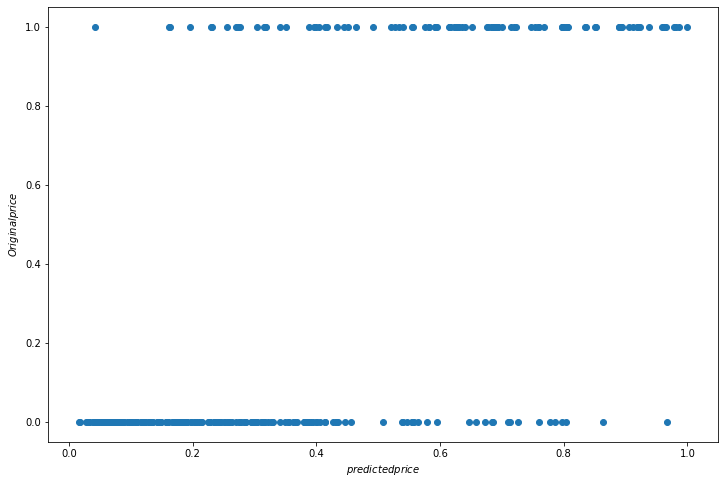

In [53]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat, y)
plt.ylabel('$Original  price$')
plt.xlabel('$predicted  price$')


Plot training loss function with iterations

Text(0, 0.5, '$J(\\theta)$')

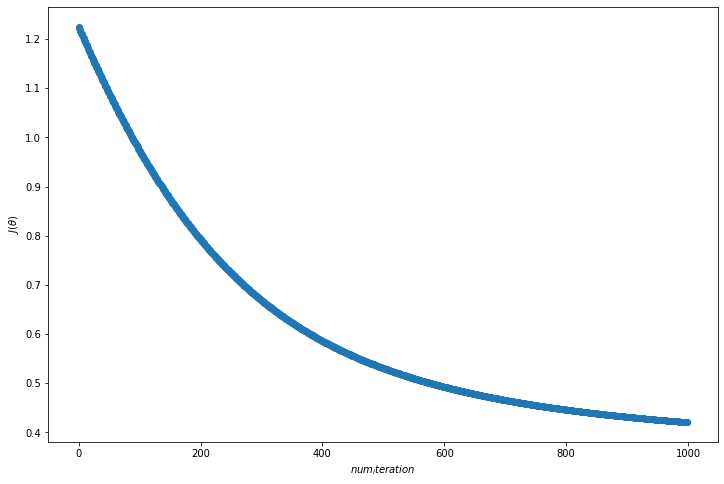

In [54]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')